In [1]:
import csv
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

In [4]:
df = pd.read_csv("covid_pooled_public_1.0.0.csv",
           sep=',',
           header=0)

/home/doma945/p36/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (227,229,231,235,237,241,475,485,546,584,586,588) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [15]:
import numpy as np

def survey(results, category_names, figsize=(12,8)):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('seismic')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=figsize)
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.1 else 'black'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 0.95),
              loc='lower left', fontsize='small')

    return fig, ax

def mysurvey(df, Q_key, Q_name, category_names, figsize=(12,8)):
    results = {}
    for key,name in zip(Q_key, Q_name):
        x = df.groupby([key]).size()
        results[name]=np.round(100*x.array/np.sum(x.array), decimals=2)
    survey(results, x.index, figsize)

In [32]:
att_sev= dict(df.groupby("att_covid_selfsevere").size())

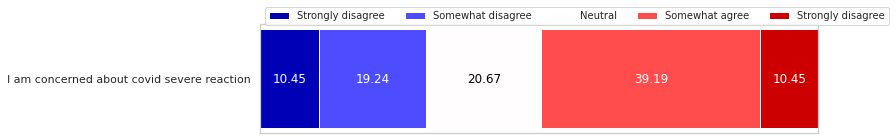

In [68]:
xlabels=['Strongly disagree', "Somewhat disagree", 'Neutral', "Somewhat agree", "Strongly disagree"]
ys = np.array([att_sev[l] for l in xlabels])
ys = np.round(100*ys/np.sum(ys), decimals=2)

labels = ["I am concerned about covid severe reaction"]
data = np.array([ys])
data_cum = data.cumsum(axis=1)
category_colors = plt.get_cmap('seismic')(
    np.linspace(0.15, 0.85, data.shape[1]))

fig, ax = plt.subplots(figsize=(10,2))
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(data, axis=1).max())
for i, (colname, color) in enumerate(zip(xlabels, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    rects = ax.barh(labels, widths, left=starts, height=0.5,
                    label=colname, color=color)

    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.1 else 'black'
    ax.bar_label(rects, label_type='center', color=text_color)

ax.legend(ncol=len(xlabels), bbox_to_anchor=(0, 0.95),
          loc='lower left', fontsize='small')
plt.show()